Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

C:\Users\surajshukla\AppData\Local\Temp\ipykernel_21748\1768194411.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Importing the Boston House Price Dataset

In [2]:
house_price_dataset = pd.read_csv("house_prices_preprocessed.csv")

In [3]:
print(house_price_dataset)

        Amount(in rupees)  Price (in rupees)  Floor  Bathroom  Balcony  \
0               4200000.0             6000.0   10.0       1.0      2.0   
1               9800000.0            13799.0    3.0       2.0      0.0   
2              14000000.0            17500.0   10.0       2.0      0.0   
3              16000000.0            18824.0   20.0       2.0      0.0   
4               4500000.0             6618.0    2.0       1.0      1.0   
...                   ...                ...    ...       ...      ...   
153143          6300000.0             3225.0    2.0       3.0      3.0   
153144          5500000.0             3274.0    4.0       3.0      0.0   
153145          7600000.0             4343.0    1.0       3.0      2.0   
153146          3000000.0             4231.0    2.0       2.0      0.0   
153147         11800000.0             6162.0    5.0       4.0      4.0   

        Total Floors  location_agra  location_ahmadnagar  location_ahmedabad  \
0               11.0           

In [4]:
# Loading the dataset to a Pandas DataFrame
# house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
house_price_dataframe = house_price_dataset

In [5]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

,Amount(in rupees),Price (in rupees),Floor,Bathroom,Balcony,Total Floors,location_agra,location_ahmadnagar,location_ahmedabad,location_allahabad,...,facing_South,facing_South - East,facing_South -West,facing_Unknown,facing_West,Ownership_Co-operative Society,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,Ownership_Unknown
0,4200000.0,6000.0,10.0,1.0,2.0,11.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,9800000.0,13799.0,3.0,2.0,0.0,22.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,14000000.0,17500.0,10.0,2.0,0.0,29.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,16000000.0,18824.0,20.0,2.0,0.0,42.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,4500000.0,6618.0,2.0,1.0,1.0,7.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# add the target (price) column to the DataFrame
house_price_dataframe['Amount(in rupees)'] = house_price_dataset['Amount(in rupees)']

In [7]:
house_price_dataframe.head()

,Amount(in rupees),Price (in rupees),Floor,Bathroom,Balcony,Total Floors,location_agra,location_ahmadnagar,location_ahmedabad,location_allahabad,...,facing_South,facing_South - East,facing_South -West,facing_Unknown,facing_West,Ownership_Co-operative Society,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,Ownership_Unknown
0,4200000.0,6000.0,10.0,1.0,2.0,11.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,9800000.0,13799.0,3.0,2.0,0.0,22.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,14000000.0,17500.0,10.0,2.0,0.0,29.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,16000000.0,18824.0,20.0,2.0,0.0,42.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,4500000.0,6618.0,2.0,1.0,1.0,7.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(153148, 110)

In [9]:
# check for missing values
house_price_dataframe.isnull().sum()

Amount(in rupees)                 0
Price (in rupees)                 0
Floor                             0
Bathroom                          0
Balcony                           0
                                 ..
Ownership_Co-operative Society    0
Ownership_Freehold                0
Ownership_Leasehold               0
Ownership_Power Of Attorney       0
Ownership_Unknown                 0
Length: 110, dtype: int64

In [10]:
# statistical measures of the dataset
house_price_dataframe.describe()

,Amount(in rupees),Price (in rupees),Floor,Bathroom,Balcony,Total Floors,location_agra,location_ahmadnagar,location_ahmedabad,location_allahabad,...,facing_South,facing_South - East,facing_South -West,facing_Unknown,facing_West,Ownership_Co-operative Society,Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,Ownership_Unknown
count,1.531480e+05,1.531480e+05,153148.000000,153148.000000,153148.000000,153148.000000,153148.000000,153148.000000,153148.000000,153148.000000,...,153148.000000,153148.000000,153148.000000,153148.000000,153148.000000,153148.000000,153148.000000,153148.000000,153148.000000,153148.000000
mean,1.212886e+07,7.589762e+03,4.857158,2.462520,1.591545,9.148144,0.002220,0.000183,0.074268,0.000882,...,0.021182,0.015945,0.012922,0.340651,0.047307,0.019269,0.616711,0.032380,0.006249,0.325391
std,4.209297e+07,2.846185e+04,4.734508,0.859819,1.202484,7.770275,0.047065,0.013520,0.262207,0.029677,...,0.143992,0.125265,0.112939,0.473930,0.212296,0.137469,0.486189,0.177009,0.078803,0.468522
min,1.000000e+05,0.000000e+00,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.900000e+06,4.267000e+03,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.800000e+06,6.000000e+03,3.000000,2.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.550000e+07,9.631000e+03,6.000000,3.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.400300e+10,6.700000e+06,200.000000,11.000000,11.000000,200.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

In [11]:
correlation = house_price_dataframe.corr()

<Axes: >

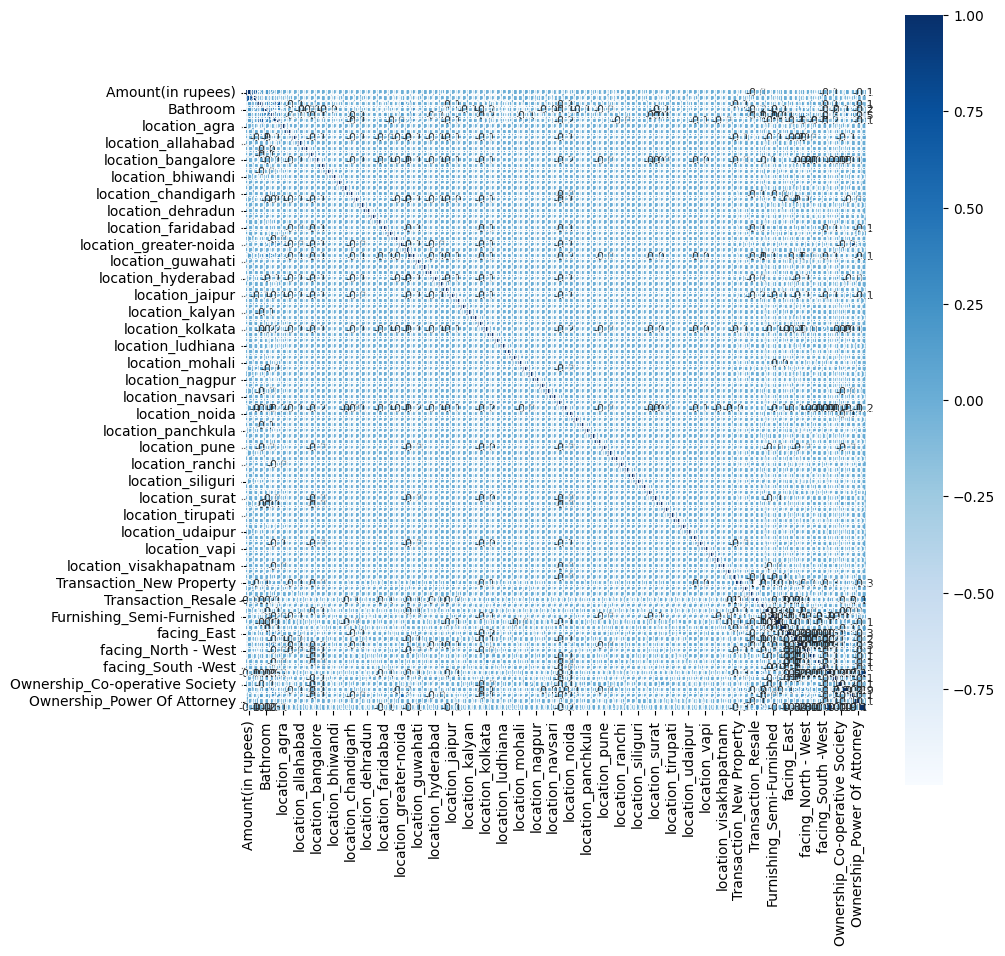

In [12]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and Target

In [13]:
X = house_price_dataframe.drop(['Amount(in rupees)'], axis=1)
Y = house_price_dataframe['Amount(in rupees)']

In [14]:
print(X)
print(Y)

        Price (in rupees)  Floor  Bathroom  Balcony  Total Floors  \
0                  6000.0   10.0       1.0      2.0          11.0   
1                 13799.0    3.0       2.0      0.0          22.0   
2                 17500.0   10.0       2.0      0.0          29.0   
3                 18824.0   20.0       2.0      0.0          42.0   
4                  6618.0    2.0       1.0      1.0           7.0   
...                   ...    ...       ...      ...           ...   
153143             3225.0    2.0       3.0      3.0           4.0   
153144             3274.0    4.0       3.0      0.0           6.0   
153145             4343.0    1.0       3.0      2.0           3.0   
153146             4231.0    2.0       2.0      0.0           2.0   
153147             6162.0    5.0       4.0      4.0          13.0   

        location_agra  location_ahmadnagar  location_ahmedabad  \
0                   0                    0                   0   
1                   0                  

Splitting the data into Training data and Test data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(153148, 109) (122518, 109) (30630, 109)


Model Training

XGBoost Regressor

In [17]:
# loading the model
model = XGBRegressor()

In [18]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [19]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [20]:
print(training_data_prediction)

[28901156.   4319306.5  3178493.8 ...  1642117.5 15979715.  11724459. ]


In [21]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9909946753632418
Mean Absolute Error :  810085.8995424397


Visualizing the actual Prices and predicted prices

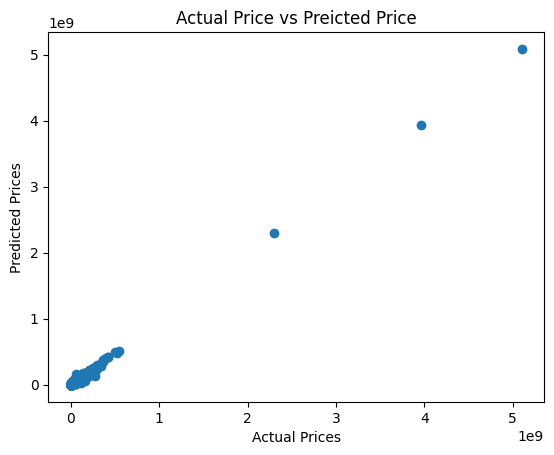

In [22]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

In [23]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [24]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.029425136306738264
Mean Absolute Error :  1421962.4550252
